<a href="https://colab.research.google.com/github/Nilufayeasmin299/Covid19-twitter-data-analysis-using-80-20-sploting-techniques/blob/main/without_CNN_80_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#read csv file 
import pandas as pd
df = pd.read_csv("/content/gdrive/My Drive/project for paper /dataset/tencities_15days_april.csv")

In [ ]:
df.head()

,twitteDate,tweet_id,created_at,text,loc,user_id,verified,CleanedText,Subjectivity,Polarity,Analysis
0,2020-04-01,1245138809454395392,2020-04-01 00:00:00+00:00,thebsimone during corona stay clean fuck free ...,CA,u282394,0,thebsimon corona stay clean fuck free manit ki...,0.733333,-0.005556,Negative
1,2020-04-01,1245138809920126983,2020-04-01 00:00:00+00:00,balance joining fight against corona turning s...,CA,u460114,0,balanc join fight corona turn shoe product med...,0.000000,0.000000,Neutral
2,2020-04-01,1245138828622471168,2020-04-01 00:00:04+00:00,tory lanez asked young thug been staying coron...,WA,u127769,0,tori lanez ask young thug stay coronafre respo...,0.400000,0.100000,Positive
3,2020-04-01,1245138837057216518,2020-04-01 00:00:06+00:00,hasanthehun donald trump already trying spin c...,FL,u457103,0,hasanthehun donald trump alreadi tri spin coro...,0.000000,0.000000,Neutral
4,2020-04-01,1245138844766416896,2020-04-01 00:00:08+00:00,ghastly corona found into life affected family...,TX,u616396,0,ghast corona found life affect famili lost ano...,0.000000,0.000000,Neutral


In [ ]:
df.columns

Index(['twitteDate', 'tweet_id', 'created_at', 'text', 'loc', 'user_id',
       'verified', 'CleanedText', 'Subjectivity', 'Polarity', 'Analysis'],
      dtype='object')

In [ ]:
tweets= df.drop(['twitteDate','tweet_id','created_at','text','loc','user_id','verified','Subjectivity','Polarity'],axis = 1)

In [ ]:
tweets.head()

,CleanedText,Analysis
0,thebsimon corona stay clean fuck free manit ki...,Negative
1,balanc join fight corona turn shoe product med...,Neutral
2,tori lanez ask young thug stay coronafre respo...,Positive
3,hasanthehun donald trump alreadi tri spin coro...,Neutral
4,ghast corona found life affect famili lost ano...,Neutral


In [ ]:
tweets.shape

(823002, 2)

In [ ]:
print(tweets.CleanedText[3])

hasanthehun donald trump alreadi tri spin corona death claim million peopl wouldv die noth


**Let's now see the distribution of sentiments across all the tweets.**

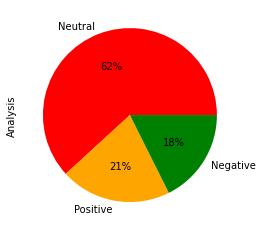

In [ ]:
tweets.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "orange", "green"])

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweet = tweets.CleanedText.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet)
X = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(len(tokenizer.word_index))

427631


In [ ]:
print(tweet[0])
print(encoded_docs[0])

thebsimon corona stay clean fuck free manit kill germ tough germ tougher fuckboy
[3, 61, 1400, 11, 213, 23, 3257, 2237, 3257]


In [ ]:
# Creat the function to get label of the dataset
def getSentiment(Analysis):
    if Analysis== 'Negative':
        return 0
    elif Analysis == 'Positive':
        return 1
    else:
      return 2
tweets['Sentiment']=tweets['Analysis'].apply(getSentiment)

In [ ]:
tweets.head()

,CleanedText,Analysis,Sentiment
0,thebsimon corona stay clean fuck free manit ki...,Negative,0
1,balanc join fight corona turn shoe product med...,Neutral,2
2,tori lanez ask young thug stay coronafre respo...,Positive,1
3,hasanthehun donald trump alreadi tri spin coro...,Neutral,2
4,ghast corona found life affect famili lost ano...,Neutral,2


In [ ]:
y= tweets['Sentiment'].values
y.shape

(823002,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(658401, 200) (658401,)
(164601, 200) (164601,)


In [ ]:
#importing all necessary libraries
from tensorflow.keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
embedding_vector_length = 32
num_labels=3

**Build CNN model**

In [ ]:
#define CNN model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length,     
                                     input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(Conv1D(128,5,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(num_labels, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           13684224  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 196, 128)          20608     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 13,705,219
Trainable params: 13,705,219
Non-trainable params: 0
____________________________________________

**Fit CNN model**

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=2, batch_size=32)

Epoch 1/2
16460/16460 [==============================] - 3024s 184ms/step - loss: 0.1225 - accuracy: 0.9605 - val_loss: 0.0366 - val_accuracy: 0.9928
Epoch 2/2
16322/16460 [============================>.] - ETA: 24s - loss: 0.0356 - accuracy: 0.9928

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn import metrics
score = metrics.log_loss(y_test, y_pred)
print("Log loss score: {}".format(score))

Log loss score: 0.0306547921242048


In [ ]:
import numpy as np 
y_pred= np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     28850
           1       1.00      0.98      0.99     33672
           2       1.00      1.00      1.00    102079

    accuracy                           0.99    164601
   macro avg       0.99      0.99      0.99    164601
weighted avg       0.99      0.99      0.99    164601

